# Linear regression to predict prices of rental apartments

## Libraries and settings

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


## Import the apartment data

In [4]:
# Define columns for import
columns = [ 'Student_ID','IQ','Grade','Age','Parents_Income','Efficiency'
           ]

# Read and select variables
df_orig = pd.read_csv("./Data/Updated_Student_Dataset_with_Efficiency.csv", 
                      sep=",", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'Student_ID': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()



print(df.shape)
df.head(5)

(500, 6)


,id,IQ,Grade,Age,Parents_Income,Efficiency
0,Student_0001,107.0,79.0,24,30322.0,80.0
1,Student_0002,98.0,89.0,21,52164.0,82.0
2,Student_0003,110.0,56.0,18,34049.0,70.0
3,Student_0004,123.0,76.0,20,38899.0,85.0
4,Student_0005,96.0,63.0,22,58381.0,68.0


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [10]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['IQ'], 
                                                    df['Efficiency'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
249    106.0
433    111.0
19      79.0
322     88.0
332    101.0
Name: IQ, dtype: float64 

y_train:
249    68.0
433    66.0
19     68.0
322    79.0
332    68.0
Name: Efficiency, dtype: float64


### Fit the simple linear regression model

In [6]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            34.70
Slope of regression line (beta):          0.383
p-value:                                  0.0000
R-squared (coefficient of determination): 0.5808


### Plot regression line

0      75.276375
1      77.190151
2      64.941989
3      68.386784
4      73.362600
         ...    
395    83.696987
396    81.400456
397    68.769539
398    73.362600
399    71.066070
Length: 400, dtype: float64


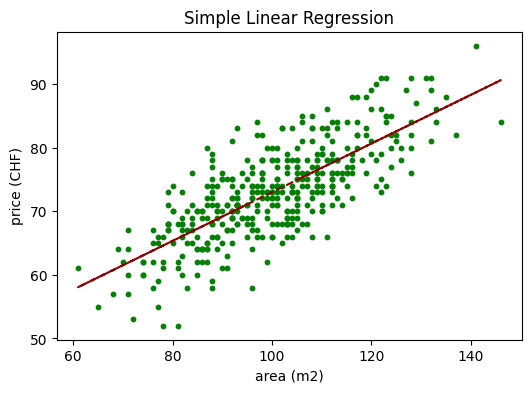

In [ ]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [22]:
# Calculate model residuals for train data
residuals = y_train - mymodel

print(y_train)
print(mymodel[0])

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

249    68.0
433    66.0
19     68.0
322    79.0
332    68.0
       ... 
106    80.0
270    86.0
348    66.0
435    71.0
102    75.0
Name: Efficiency, Length: 400, dtype: float64
75.27637525712879
1st Predicted price in dataset: 75.28


KeyError: 0

### Plot histogram of residuals

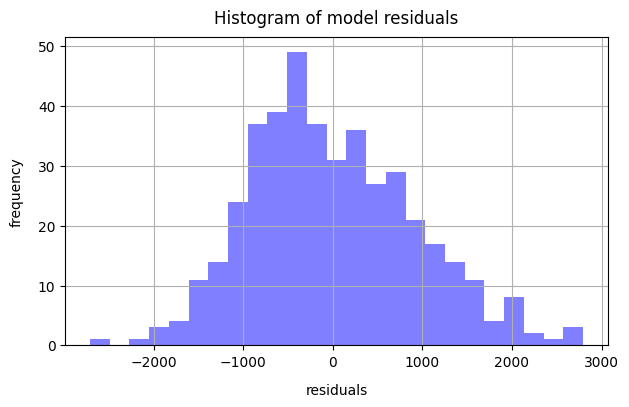

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [8]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 2031.6
Observed price: 1640.0, Predicted price: 2004.5
Observed price: 1568.0, Predicted price: 2167.1
Observed price: 2290.0, Predicted price: 2207.8
Observed price: 4950.0, Predicted price: 2627.8
Observed price: 1787.0, Predicted price: 2248.4
Observed price: 3495.0, Predicted price: 2519.4
Observed price: 2450.0, Predicted price: 2031.6
Observed price: 3390.0, Predicted price: 2871.6
Observed price: 2836.0, Predicted price: 2573.6


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [9]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens
503   120   165.018625
6      65   525.662252
400    90   424.146342
644    63  1044.628957
484    91   399.525129 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [10]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     409.2
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          3.50e-111
Time:                        13:18:56   Log-Likelihood:                -4420.2
No. Observations:                 577   AIC:                             8846.
Df Residuals:                     574   BIC:                             8860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.1861     78.086      4.241      0.0

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

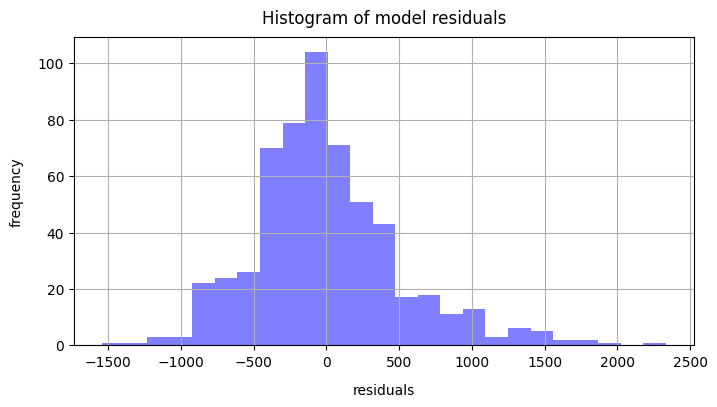

In [11]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()

plt.show()

### Compare observed prices with predicted prices

In [12]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1730.3
Observed price: 1640.0, Predicted price: 1600.6
Observed price: 1568.0, Predicted price: 1806.3
Observed price: 2290.0, Predicted price: 2704.6
Observed price: 4950.0, Predicted price: 2519.3
Observed price: 1787.0, Predicted price: 2201.5
Observed price: 3495.0, Predicted price: 3116.8
Observed price: 2450.0, Predicted price: 2471.6
Observed price: 3390.0, Predicted price: 2685.2
Observed price: 2836.0, Predicted price: 2405.3


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [13]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-10 13:18:56
Python Version: 3.11.10
-----------------------------------
